In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
from sklearn import svm
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# A

In [7]:
# data size
df=pd.read_csv('gdrive/MyDrive/Colab Notebooks/deep/Heart_Disease_Dataset.csv')
print(df.shape)
df.head()

(1190, 12)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [29]:
# find not assigned feature
for column in df:
  print(column,'na indexes:',(np.array(df.index[df['sex'].isnull()==True])))
# all features are complete

age na indexes: []
sex na indexes: []
chest pain type na indexes: []
resting bp s na indexes: []
cholesterol na indexes: []
fasting blood sugar na indexes: []
resting ecg na indexes: []
max heart rate na indexes: []
exercise angina na indexes: []
oldpeak na indexes: []
ST slope na indexes: []
target na indexes: []


In [36]:
# balance of two classes
print('number of patients', df[df.target==1].shape[0], 'vs. number of normal peaple', df[df.target==0].shape[0])

number of patients 629 vs. number of normal peaple 561


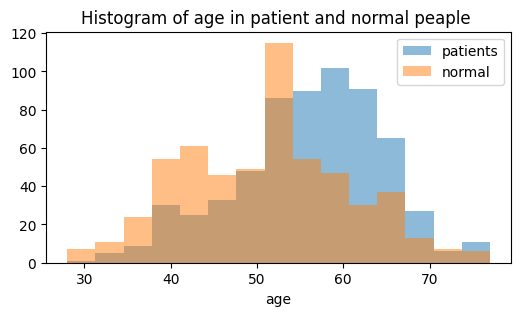

In [47]:
# histogram of age in two classes
plt.figure(figsize=(6,3))
plt.title('Histogram of age in patient and normal peaple ')
plt.hist( df[df.target==1]['age'],bins=15,range=(df.age.min(),df.age.max()),alpha=0.5)
plt.hist( df[df.target==0]['age'],bins=15,range=(df.age.min(),df.age.max()),alpha=0.5)

plt.legend(['patients','normal'])
plt.xlabel('age')
plt.show()

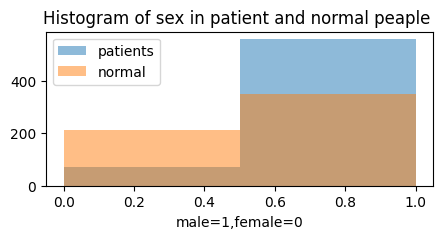

In [53]:
# histogram of sex in two classes
plt.figure(figsize=(5,2))
plt.title('Histogram of sex in patient and normal peaple ')
plt.hist( df[df.target==1]['sex'],bins=2,alpha=0.5)
plt.hist( df[df.target==0]['sex'],bins=2,alpha=0.5)

plt.legend(['patients','normal'])
plt.xlabel('male=1,female=0')
plt.show()

# B outlier omitting

In [8]:
import scipy.stats as stats
outliers=[]
for column in df:
  z=np.abs(stats.zscore(df[column]))
  for i in df[z>3].index:
    outliers.append(i)
  df=df[z<3]

df.shape

(1162, 12)

بنابراین 28 داده پرت محاسبه و از داده ها حذف شدند.
و اندیس داده ها حرف شده ذخیره شدند.

# C Normalization

In [10]:
for column in df:
  if(max(df[column])>1):
    df[column]=df[column]/max(df[column])

# D learning

In [11]:
# data spliting
from sklearn.model_selection import train_test_split
data=df.to_numpy()
print(type(data))
print(data.shape)
X_train, X_test, y_train, y_test = train_test_split(data[:,0:11], data[:,11] ,train_size=0.7,random_state=42)


<class 'numpy.ndarray'>
(1162, 12)


In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from random import randrange
import random
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score

**linear svm**

In [ ]:
# training linear SVM
#parameter set with cross validation
C = [0.001 ,0.01, 0.1, 1, 10,100]
for c in C:
  accuracies = []
  clf_total = make_pipeline(StandardScaler(), LinearSVC(C=c))
  accuracy =cross_val_score(clf_total,X_train, y_train, cv= 5).mean()
  print('Train Accuracy for C=', c, ': ', accuracy)
  accuracies.append(accuracy)

In [13]:
clf=LinearSVC(C=1, dual=False)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
print('Train Accuracy : ', clf.score(X_train,y_train))
print('Test Accuracy : ', clf.score(X_test,y_test))
print('precision:',average_precision_score(y_test,clf.predict(X_test)))
print('recall:',recall_score(y_test,clf.predict(X_test)))
print('f1 score:',f1_score(y_test,clf.predict(X_test)))

Train Accuracy :  0.8388683886838868
Test Accuracy :  0.8223495702005731
precision: 0.7627742983927625
recall: 0.8895027624309392
f1 score: 0.8385416666666667


بنابراین با اسویام خطی به دقت 82  درصد رسیدیم باقی پارامتر ها نظیر ریکال و پریسیشن و افاسکور هم در بالا بدست آمده است.

**rbf kernel**

In [100]:
#rbf kernel
# Hyperparameter tunning using greed search
grid_param = {"C":  np.logspace(-3, 3, 7),
             "gamma": np.logspace(-5, 2, 8)}

grid_search_surprise = GridSearchCV(estimator = SVC(), param_grid = grid_param, return_train_score=True,
                          cv = 3, n_jobs = -1, verbose = 2)

# fitting the result of grid search on validation data
#scale=StandardScaler()
#scale.fit(X_train)
grid_search_surprise.fit(X_train, y_train)
print('Best parameters found the Surprise Classifier: ', grid_search_surprise.best_params_)

Fitting 3 folds for each of 56 candidates, totalling 168 fits
Best parameters found the Surprise Classifier:  {'C': 1000.0, 'gamma': 1e-05}


In [26]:
#clf = make_pipeline(StandardScaler(),SVC(C=1000, gamma=0.0001))
clf=SVC(C=1000000, gamma=0.00001)
clf.fit(X_train, y_train)
y_test_predicted = clf.predict(X_test) # predicted labels

print('Train Accuracy : ', clf.score(X_train,y_train))
print('Test Accuracy : ', clf.score(X_test,y_test))
print('precision:',average_precision_score(y_test,clf.predict(X_test)))
print('recall:',recall_score(y_test,clf.predict(X_test)))
print('f1 score:',f1_score(y_test,clf.predict(X_test)))

Train Accuracy :  0.8388683886838868
Test Accuracy :  0.8252148997134671
precision: 0.7631177415407022
recall: 0.9060773480662984
f1 score: 0.8431876606683805


بنابراین با کرنل گوسی به دقت 85 درصد رسیدیم باقی پارامتر ها نظیر ریکال و پریسیشن و افاسکور هم در بالا بدست آمده است.

**poly kernel**

In [28]:
# training SVM
for d in range(1,10):
  accuracies = []
  clf=SVC(kernel='poly',degree=d)
  accuracy =cross_val_score(clf,X_train, y_train, cv= 5).mean()
  print('Train Accuracy for d=', d, ': ', accuracy)
  accuracies.append(accuracy)

Train Accuracy for d= 1 :  0.8351435279860638
Train Accuracy for d= 2 :  0.8449973490873287
Train Accuracy for d= 3 :  0.857290009846247
Train Accuracy for d= 4 :  0.8511474664848897
Train Accuracy for d= 5 :  0.849928046656063
Train Accuracy for d= 6 :  0.8548435961523897
Train Accuracy for d= 7 :  0.8376353858971445
Train Accuracy for d= 8 :  0.8438233734757251
Train Accuracy for d= 9 :  0.8474967810346132


In [31]:
clf=SVC(kernel='poly',degree=6)
clf.fit(X_train,y_train)
print('Train Accuracy : ', clf.score(X_train,y_train))
print('Test Accuracy : ', clf.score(X_test,y_test))
print('precision:',average_precision_score(y_test,clf.predict(X_test)))
print('recall:',recall_score(y_test,clf.predict(X_test)))
print('f1 score:',f1_score(y_test,clf.predict(X_test)))

Train Accuracy :  0.9704797047970479
Test Accuracy :  0.8481375358166189
precision: 0.8068106404773641
recall: 0.8453038674033149
f1 score: 0.8523676880222841


بنابراین با کرنل پولی به دقت 84 درصد رسیدیم باقی پارامتر ها نظیر ریکال و پریسیشن و افاسکور هم در بالا بدست آمده است

https://colab.research.google.com/drive/1kwPPymTCIMvHciCyaG5RW5PVpCOKJk2r?usp=sharing